In [170]:
from PIL import Image
import imutils
import numpy as np
import cv2

In [171]:
value = 400000
bundles = value / 10000

length = 156
height = 66
depth = 10

alpha = np.cbrt(bundles * length * height * depth)

In [172]:
l = round(alpha / length)
h = round(alpha / height)
d = round(alpha / depth)

print(l,h,d)

1 2 16


In [173]:
front = np.asarray(Image.open("imgs/front.jpg"))
back = np.asarray(Image.open("imgs/back.jpg"))
side = np.asarray(Image.open("imgs/side.jpg"))

full_dims = (2048,2048) # x,y

front_bills_x = int(1024 / l )
front_bills_y = int(1024 / h)
front_scaled = cv2.resize(front, (front_bills_x, front_bills_y))


front_layer = np.dstack([np.full((1024, 1024), 255) for _ in range(3)])

for i in range(l):
    for j in range(h):
        front_layer[j * front_bills_y: (j+1) * front_bills_y, i*front_bills_x:(i+1)*front_bills_x, :] = front_scaled

back_bills_x = int(1024 / l)
back_bills_y = int(1024 / h)
back_scaled = cv2.resize(back, (back_bills_x, back_bills_y))

back_layer = np.dstack([np.full((1024, 1024), 255) for _ in range(3)])
        
for i in range(l):
    for j in range(h):
        back_layer[j * back_bills_y: (j+1) * back_bills_y, i*back_bills_x:(i+1)*back_bills_x, :] = back_scaled
        
side_bills_x = int(1024 / d)
side_bills_y = int(2048 / h)
side_scaled = cv2.resize(side, (side_bills_x, side_bills_y))

side_layer = np.dstack([np.full((2048, 1024), 255) for _ in range(3)])

for i in range(d):
    for j in range(h):
        side_layer[j * side_bills_y: (j+1) * side_bills_y, i*side_bills_x:(i+1)*side_bills_x, :] = side_scaled     

In [174]:
Image.fromarray(side_layer.astype(np.uint8))
print(side_layer.shape)

(2048, 1024, 3)


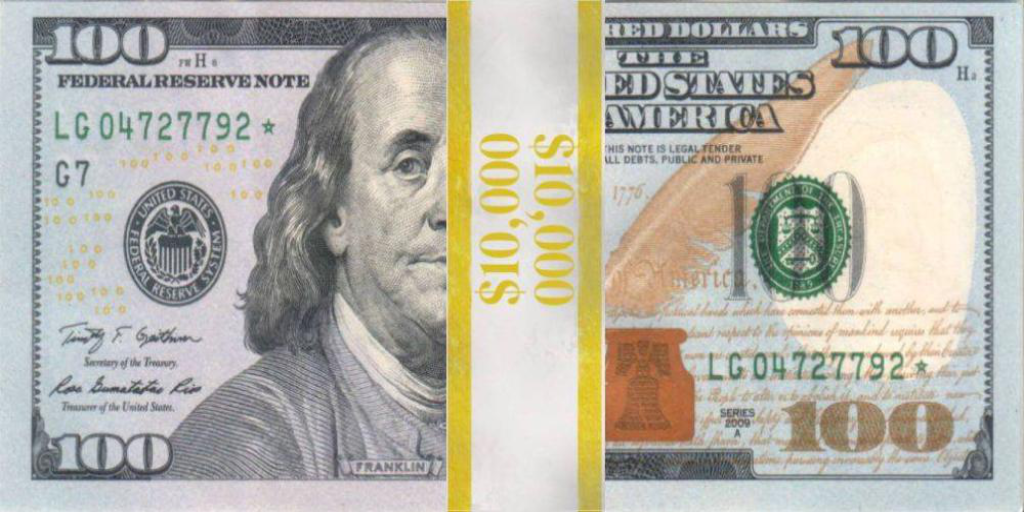

In [175]:
Image.fromarray(front_scaled)

In [176]:
type(front_layer[0][0][0])

numpy.int64

In [177]:
front_scaled[0][0]

array([190, 196, 192], dtype=uint8)

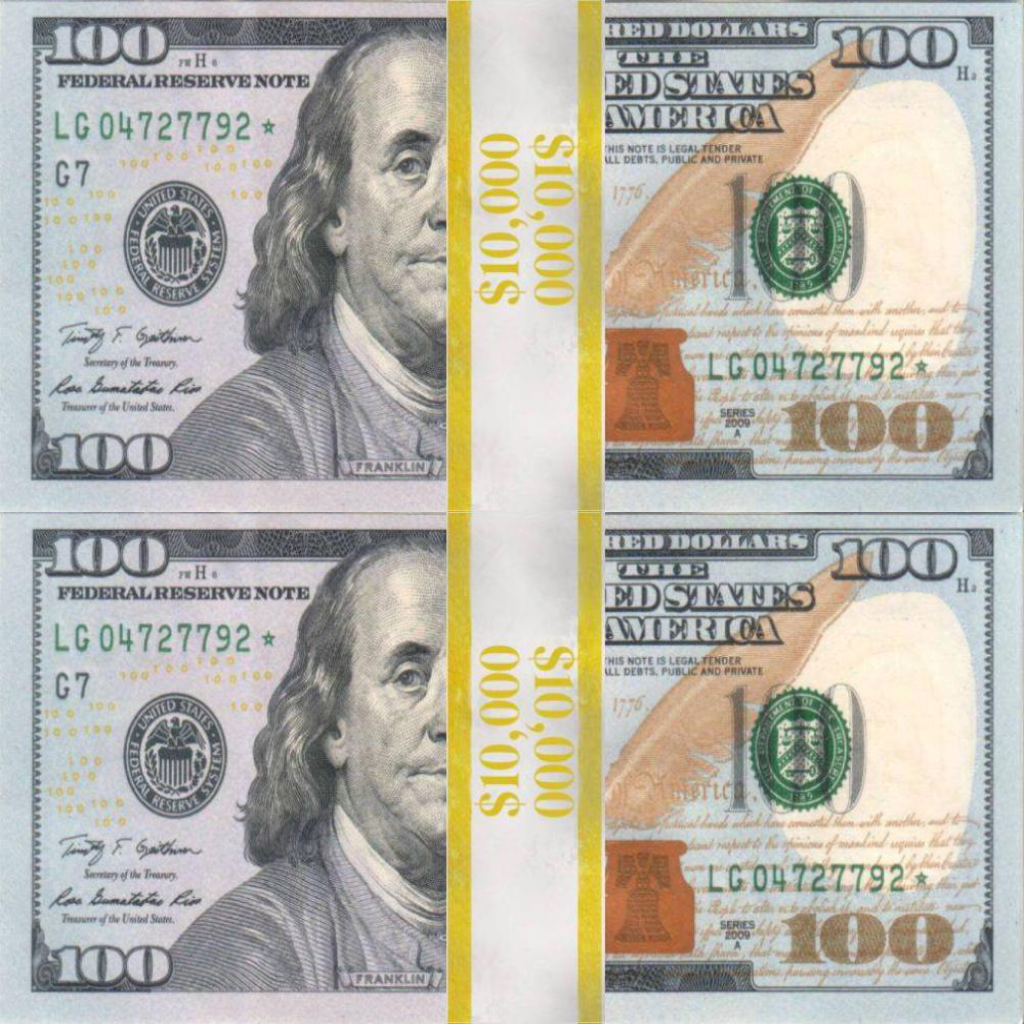

In [178]:
Image.fromarray(front_layer.astype(np.uint8))

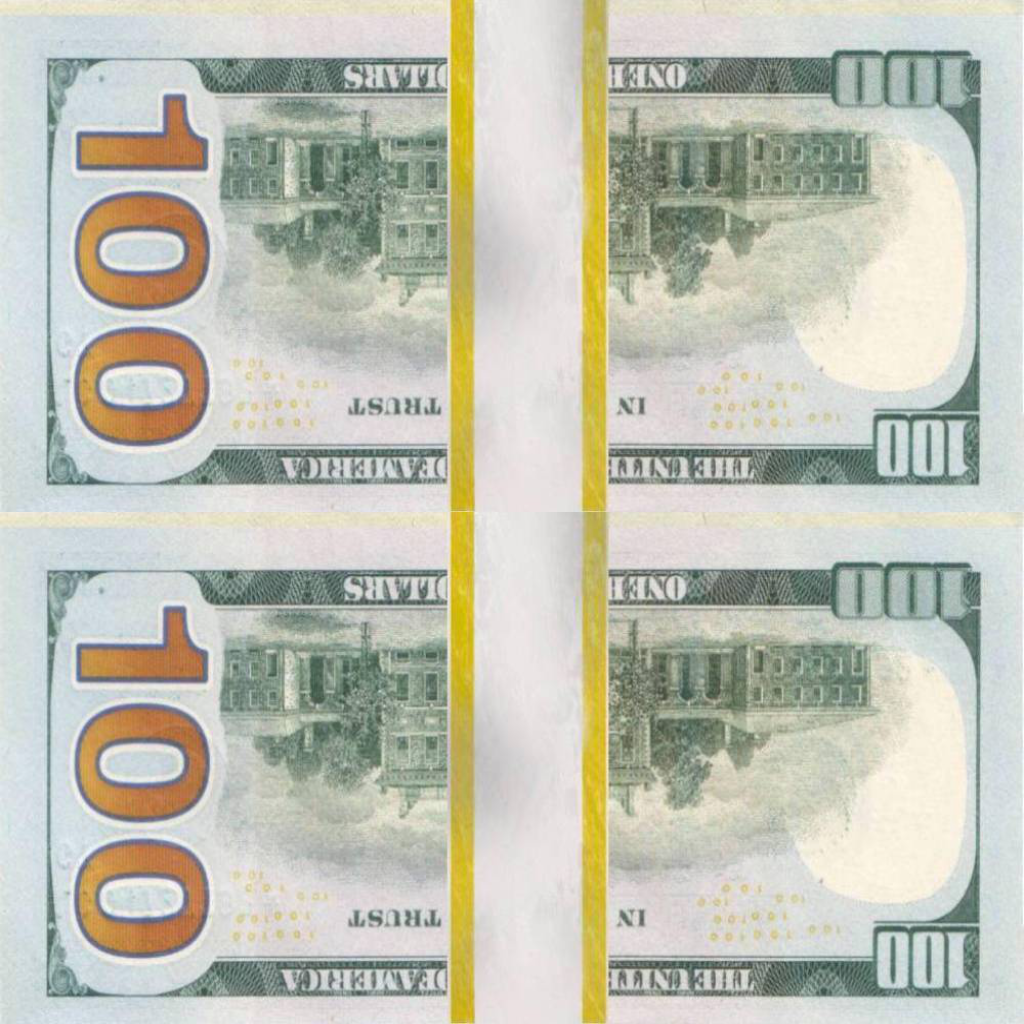

In [179]:
Image.fromarray(back_layer.astype(np.uint8))

In [180]:
texture = np.dstack([np.full((2048, 2048), 255) for _ in range(3)])
texture[0:1024,0:1024,:] = front_layer
texture[1024:,0:1024,:] = back_layer
texture[:, 1024:, :] = side_layer

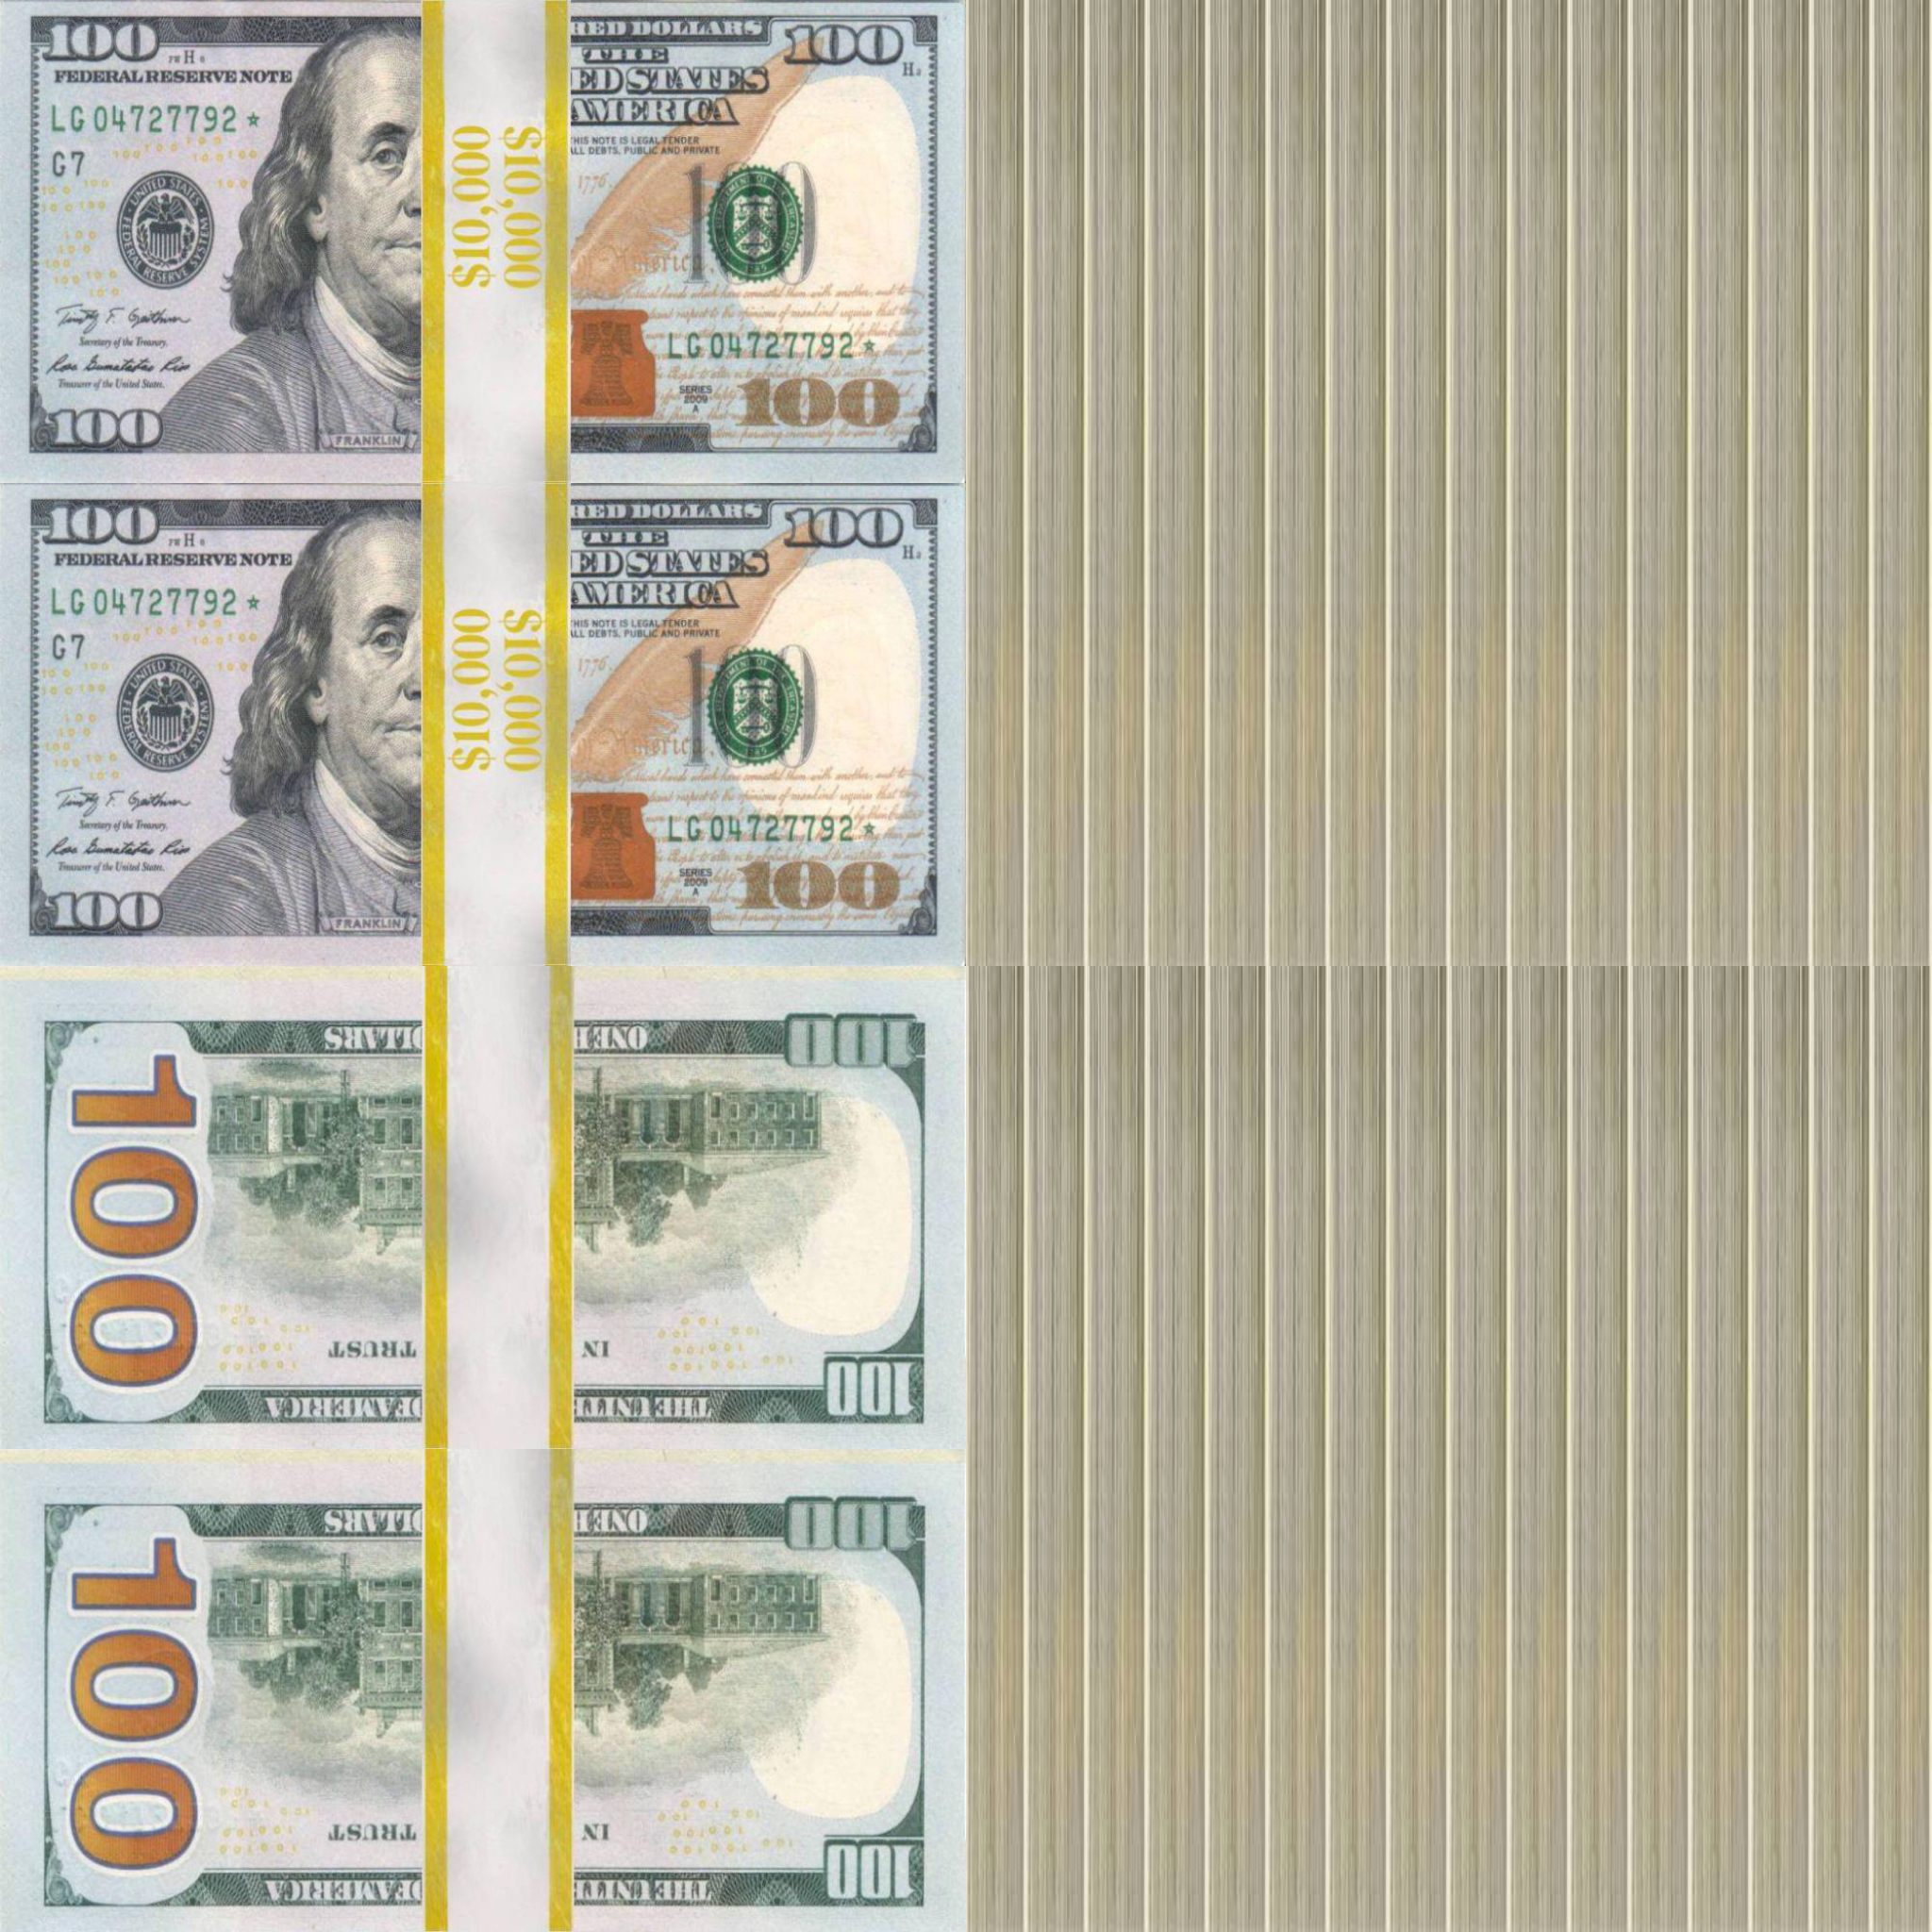

In [181]:
Image.fromarray(texture.astype(np.uint8))